In [179]:
#Import all the necessary packages here
import pandas as pd
from pandas.core import datetools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import statsmodels
from statsmodels.tsa.stattools import adfuller
#import warnings
#warnings.filterwarnings("ignore") 

#from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 15,6

In [130]:
# this is for 
#1. checking the dataframe values
#2. Feed the delimiter character to the 
#3. Assignt the values under columns

df1= pd.read_csv("/home/sdi/cpu-trend.txt",sep = ';',names = ["times","Symbol","value"])
# Take only one VM as of now as it disturbs the order of the timeseries.
df2 = df1.loc[lambda df: df.Symbol== 'vmy2954']
#Drop Symbol column as it doesn't really matter anymore since we filtered out only one VM
df5 = df2.drop('Symbol',axis=1)

#df5


In [163]:
dateparse = lambda dates: pd.datetime.strptime(dates,'%Y-%m-%d %H:%M:%S')
df = pd.read_csv("/home/sdi/cpu-24.txt",sep = ";",names = ["times","Symbol","value"],index_col='times',date_parser=dateparse)
#convert the time column in datetime format
df4 = df.loc[lambda df: df.Symbol== 'vmy2954']
df4 = df4.drop('Symbol',axis=1)
df4 = df4.resample("60Min").mean()
df4.to_csv('/home/sdi/df_csv')

In [152]:
#Convert into time series
ts = df4['value']
len(ts)

26

# Time Series Plot

Text(0,0.5,'CPU Idle value')

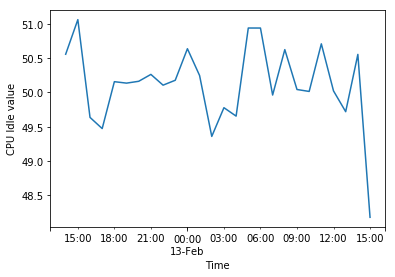

In [153]:

import matplotlib.dates as mdates
%matplotlib inline
ax = ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('CPU Idle value')

# Stationarity Test - Dickey Fuller Test

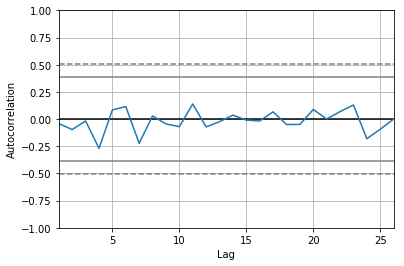

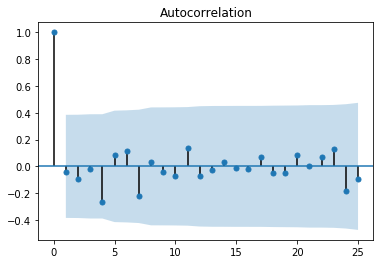

In [154]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

autocorrelation_plot(ts)
pyplot.show()

plot_acf(ts)
pyplot.show()

ararray = (ENOC.logENOC.dropna().as_matrix())

p=0
q=0
d=0
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print (x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
            
            
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print "Best Model is :", (p,d,q)
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          50.1214      0.109    460.155      0.000      49.908      50.335
ar.L1.value    -0.0706      0.254     -0.277      0.784      -0.569       0.428


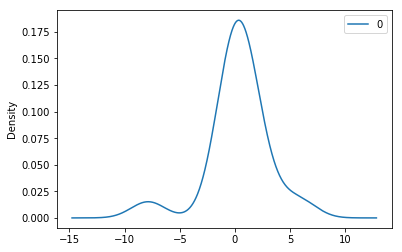

               0
count  17.000000
mean    0.300659
std     2.715129
min    -7.864232
25%    -0.509225
50%     0.442868
75%     1.282545
max     5.914031


In [156]:

from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts, order=(1,0,0))
model_fit = model.fit(disp=-1)
print(model_fit.summary().tables[1])

#line plot of residuals
#residuals = DataFrame(model_fit.resid)
#residuals.plot()
#pyplot.show()

#density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

#summary stats of residuals
print(residuals.describe())

predicted=49.679722, expected=49.960367
predicted=49.867968, expected=50.621626
predicted=50.342355, expected=50.040887
predicted=50.237086, expected=50.012577
predicted=50.867961, expected=50.705963
predicted=50.202379, expected=50.020552
predicted=50.236801, expected=49.717645
predicted=50.132993, expected=50.552055
predicted=50.187567, expected=48.179286
Test MSE: 0.592


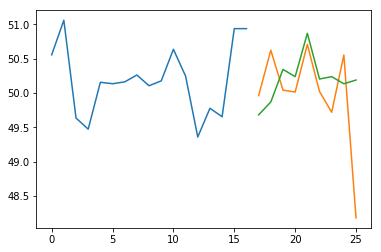

In [157]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

X = ts.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
#	print ("output", output)
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.plot([None for i in train] + [x for x in predictions])
pyplot.show()


From the above test we can see that the test statistic value is way less than the Critical value (1%) so that means that the series is stationary for atleast 99%.

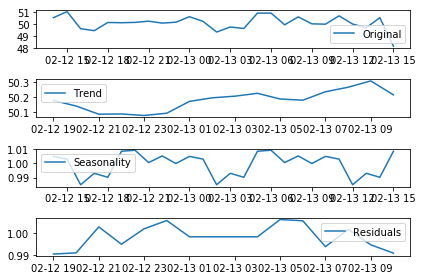

In [206]:
#ts_log_moving_avg_diff.dropna(inplace=True)
#test_stationarity(ts_log_moving_avg_diff)

#expwighted_avg = pd.ewma(ts_log, com =10, adjust = True)
#plt.plot(ts_log)
#plt.plot(expwighted_avg, color='red')

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,model='multiplicative',freq = 10)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Random Statistics stuff - Not needed but no deletion

In [ ]:
#Try to eliminate trend if any.

ts_log = np.log(ts)
plt.subplot(211)
plt.plot(ts_log)

#Moving Average
plt.subplot(212)
moving_avg = pd.rolling_mean(ts_log,window =6)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [ ]:
#s_log_moving_avg_diff = ts_log - moving_avg
#s_log_moving_avg_diff.head(6)

In [ ]:
#ts_log_ewma_diff = ts_log - expwighted_avg
#test_stationarity(ts_log_ewma_diff)

# R Stuff - Experimentation

In [212]:
%reload_ext rpy2.ipython
%matplotlib inline
from fbprophet import Prophet
import pandas as pd
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

In [215]:
%%R -w 10 -h 6 -u in
df <- read.csv("/home/sdi/df_csv")
m <- prophet(df)


Error in prophet(df) : could not find function "prophet"


In [207]:
%R setwd('/home/sdi')

array(['/home/sdi'], dtype='<U9')

In [208]:
%R list.files()

array(['anaconda3', 'Anaconda3-4.1.1-Linux-x86_64.sh', 'certs',
       'checkpoint', 'cpu-24.txt', 'cpu-nw.txt', 'cpu-trend.txt',
       'cpu.txt', 'df_csv', 'hdfs-consumer.ipynb',
       'kafka-consumer-Copy1.ipynb', 'kafka-consumer-Copy2.ipynb',
       'kafka-consumer-Copy3.ipynb', 'kafka-consumer.ipynb',
       'kafka-consumer_TS.ipynb', 'kafka-consumer-write-to-file.ipynb',
       'kafka-consumer-write-to-file.py', 'nohup.out', 'R', 'reports',
       'spark-2.2.1-bin-hadoop2.7', 'spark-warehouse', 'statsmodels',
       'Time Series Forecasting - Adding R forecasting.ipynb',
       'TimeSeries_forecasting_First.ipynb',
       'TimeSeries_Forecasting_Two.ipynb', 'Untitled.ipynb'], dtype='<U52')

In [ ]:
from rpy2.robjects.packages import _get_namespace
from rpy2.rinterface import RRuntimeError
from rpy2.rinterface import NARealType
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
pandas2ri.activate()


In [ ]:
%reload_ext rpy2.ipython

In [ ]:
ts=ro.r('ts')
forecast = importr('forecast')
ggplot = importr('ggplot2')
t_series = importr('tseries')
stats = importr('stats')


#r_dataframe = pandas2ri.py2ri(df3)
#print(type(r_dataframe))

In [ ]:
%%R
library(lubridate)
r_date <-as.double(strptime(df5$datetime),"%Y-%m-%d %H:%M:%S")
r_metric <- as.numeric(df5$value)
#r_date <- as.Date(as.character(df3$Timeframe), "%Y-%m-%d %H:%M:%S")
str(df5)

In [ ]:
%R require(ggplot2)


In [ ]:
pandas_to_r(df3, "df")

In [ ]:
%R
r_dataframe$Timeframe <-strptime(r_dataframe$Timeframe,"%Y-%m-%d %H:%M:%S")
#str(df4$TimeFrame )

In [ ]:

%%R
library(lubridate)
r_date <-as.double(strptime(df3$Timeframe),"%Y-%m-%d %H:%M:%S")
r_metric <- as.numeric(df3$Metric)
#r_date <- as.Date(as.character(df3$Timeframe), "%Y-%m-%d %H:%M:%S")
#str(df3)

In [ ]:
%%R
library(xts)

r_data <- xts(order.by=as.POSIXct(r_date),r_metric)
class(r_data)

In [ ]:
%%R
library(ggplot2)
PCP <- ts(r_data, frequency = 24*60*60/10, start = c(2018-02-12))
#plot(r_data, major.format = TRUE)
#plot(as.xts(r_data))
plot(PCP,type = 'l')
